In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("Iris.csv")

In [5]:
df.head()


Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

We only want to keep the data which is relevant to make predictions. As Id is not a relevant variable we will remove it. This process of Removing irrelevant or repeated data is known as Dimensionality Reduction.

In [6]:
df=df.drop("Id",axis=1)

In [7]:
df

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]

<h1>1 - Extract Data</h1>


In [9]:
Y=df["Species"] #Target Variable

In [14]:
X=df.drop("Species",axis = 1) #As this should only contain the Feature Variables, axis =1 as we need to look in colomns

In [19]:
df.info() #Ensure no vale is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [20]:
type(X) #Ensure Feature are of Array or Dataframe type

pandas.core.frame.DataFrame

In [21]:
X.shape #Ensure Features are in form of rows and colomns

(150, 4)

In [ ]:
#Ensure Features are on the same scale
#Ensure all features are numeric

<h1> 2 - Spilt the Dataset </h1>

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=42)

<h1>3- Train the model on Training Data </h1>

In [22]:
from sklearn.neighbors import KNeighborsClassifier # Importing the classifier

In [24]:
knn = KNeighborsClassifier(n_neighbors = 5) #instantiation

In [25]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

<h1>4 - Test the model on Testing Data</h1>

In [26]:
knn.score(X_test,Y_test) #Testing the accuracy of the developed model

0.9777777777777777

<h1> Building Graph for Ideal K value </h1>

In [29]:
kvalues=[2,3,4,5,6,7,8,9,10]



In [36]:
testscorelist=[]
trainscorelist=[]

for k in kvalues :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    testscore=knn.score(X_test,Y_test)
    testscorelist.append(testscore)
    trainscore=knn.score(X_train,Y_train)
    trainscorelist.append(trainscore)

In [37]:
trainscorelist

[0.9904761904761905,
 0.9619047619047619,
 0.9809523809523809,
 0.9714285714285714,
 0.9619047619047619,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714,
 0.9714285714285714]

In [38]:
testscorelist


[0.9111111111111111,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9555555555555556,
 0.9555555555555556]

In [39]:
import matplotlib.pyplot as plt

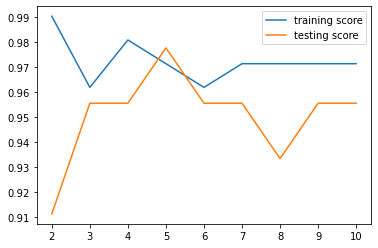

In [40]:
plt.plot(kvalues,trainscorelist,label="training score")
plt.plot(kvalues,testscorelist,label = "testing score")
plt.legend()
plt.show()

As is visible from the graph, for k=2 we are overfitting as although the training score is very high the testing score is ver very less. Similarly for k=10 we are underfitting the model as both scores decline.
Therefore the ideal scenario is that we choose a middle value of K such as 5 or 6 which indicates a perfectly fitted model.